<a href="https://colab.research.google.com/github/chimneyeffect12/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:11<00:00, 127MB/s]
100% 1.06G/1.06G [00:11<00:00, 96.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/dogs-vs-cats.zip' mode='r'>>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [ ]:
#generators
train_ds =  keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds =  keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label
  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [ ]:
#create CNN Model
model = Sequential()

model.add(Conv2D(32, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, (3,3), 1, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 106ms/step - loss: 1.2342 - accuracy: 0.5996 - val_loss: 0.7973 - val_accuracy: 0.6604
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5645 - accuracy: 0.7106 - val_loss: 0.7797 - val_accuracy: 0.6576
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4934 - accuracy: 0.7656 - val_loss: 0.5985 - val_accuracy: 0.7018
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4209 - accuracy: 0.8063 - val_loss: 0.4669 - val_accuracy: 0.7782
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3589 - accuracy: 0.8407 - val_loss: 0.4325 - val_accuracy: 0.8020
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2910 - accuracy: 0.8716 - val_loss: 0.4885 - val_accuracy: 0.7902
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2342 - accuracy: 0.8970 - val_loss: 0.5429 - val_ac

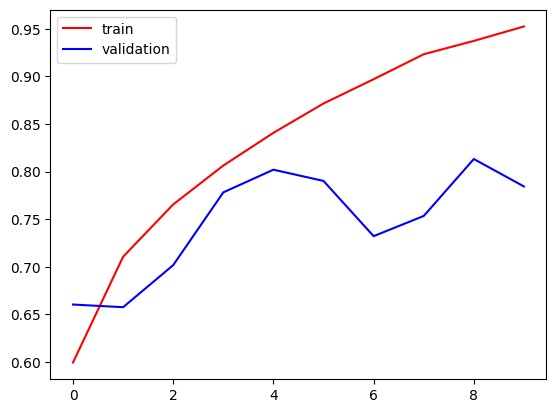

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

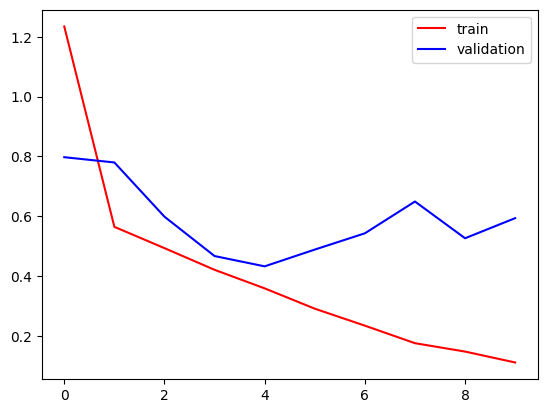

In [ ]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
  import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

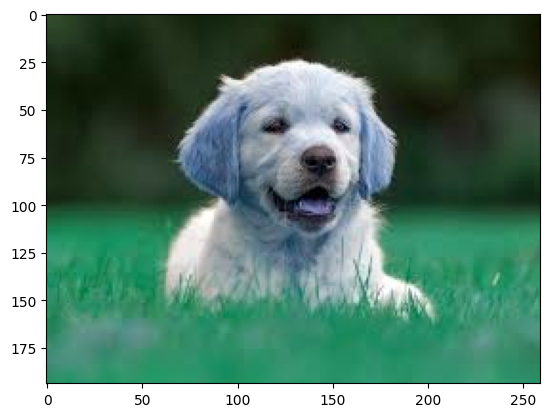

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 558ms/step


array([[0.9981517]], dtype=float32)

In [ ]:
test_img1 = cv2.imread('/content/cat.jpg')

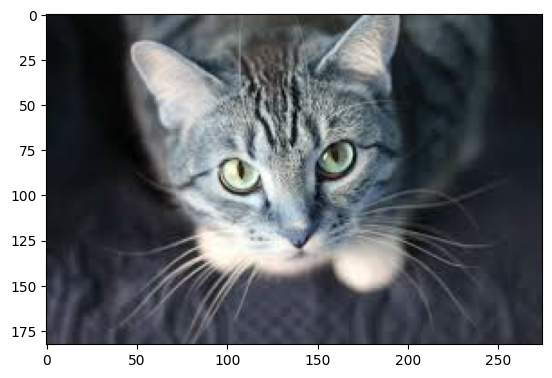

In [ ]:
plt.imshow(test_img1)

In [ ]:
test_img1 = cv2.resize(test_img1,(256,256))

In [ ]:
test_input1 = test_img1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input1)

1/1 [==============================] - 0s 18ms/step


array([[2.2769662e-05]], dtype=float32)